## Overview:
    
    PyMC3 and toy examples
    Bayesian Regression
    Dataset
    Modeling

## PyMC3
PyMC3 is a powerful, flexible, and user-friendly library for probabilistic programming in Python. It allows users to build and estimate complex statistical models using Bayesian inference. PyMC3 leverages advanced MCMC (Markov Chain Monte Carlo) algorithms, such as the No-U-Turn Sampler (NUTS), to perform efficient sampling from posterior distributions.

### Key Features of PyMC3

* Probabilistic Modeling:PyMC3 supports the definition of complex probabilistic models with a wide variety of distributions and custom likelihoods. 

* Bayesian Inference: PyMC3 provides tools for Bayesian inference, allowing users to estimate posterior distributions of model parameters. It can handle prior distributions, posterior predictive checks, and model comparison.

* Advanced MCMC Sampling: PyMC3 includes state-of-the-art MCMC algorithms, such as NUTS (No-U-Turn Sampler), HMC (Hamiltonian Monte Carlo), and Metropolis-Hastings.These algorithms allow for efficient sampling from complex, high-dimensional posterior distributions.



### Basic Workflow with PyMC3

#### Model Definition:
Define the probabilistic model within a with pm.Model() as model: context.
Specify priors, likelihoods, and deterministic relationships between variables.

#### Sampling:
Use pm.sample() to draw samples from the posterior distribution.
Tuning parameters, such as the number of samples and the number of tuning steps, can be specified.

#### Posterior Analysis:
Analyze the samples using summary statistics, trace plots, and posterior predictive checks.
Use libraries like ArviZ for advanced diagnostics and visualization.

In [6]:
import pymc3 as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt


In [7]:
# Generate example data
np.random.seed(123)
data = pd.DataFrame({
    'age': np.random.randint(18, 70, 100),
    'vehicle_age': np.random.randint(1, 10, 100),
    'claims': np.random.poisson(1.5, 100)
})

X = data[['age', 'vehicle_age']]
y = data['claims']
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
with pm.Model() as model:
    # Priors for regression coefficients
    beta = pm.Normal('beta', mu=0, sigma=10, shape=X_scaled.shape[1])
    
    # Intercept
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    
    # Linear model
    mu = intercept + pm.math.dot(X_scaled, beta)
    
    # Likelihood
    y_obs = pm.Poisson('y_obs', mu=pm.math.exp(mu), observed=y)
    
    # Posterior sampling
    trace = pm.sample(2000, tune=1000, cores=2)

# Summary of posterior
az.summary(trace)

# Plot posterior distributions
az.plot_posterior(trace)
plt.show()



The summary will provide mean, standard deviation, and credible intervals for each parameter.
The posterior plot will show the distribution of the parameters, helping to understand their uncertainty.

## Dataset Description: Insurance Claims Prediction
Source: https://www.kaggle.com/datasets/litvinenko630/insurance-claims/data

In the insurance industry, accurately predicting the likelihood of claims is essential for risk assessment and policy pricing. However, insurance claims datasets frequently suffer from class imbalance, where the number of non-claims instances far exceeds that of actual claims. This class imbalance poses challenges for predictive modeling, often leading to biased models favoring the majority class, resulting in subpar performance for the minority class, which is typically of greater interest.

### Dataset Overview:
The dataset utilized in this project comprises historical data on insurance claims, encompassing a variety of information about the policyholders, their demographics, past claim history, and other pertinent features. The dataset is structured to facilitate predictive modeling tasks aimed at accurately identifying the likelihood of future insurance claims.

### Key Features:

* Policyholder Information: This includes demographic details such as age, gender, occupation, marital status, and geographical location.

* Claim History: Information regarding past insurance claims, including claim amounts, types of claims (e.g., medical, automobile), frequency of claims, and claim durations.
* Policy Details: Details about the insurance policies held by the policyholders, such as coverage type, policy duration, premium amount, and deductibles.
* Risk Factors: Variables indicating potential risk factors associated with policyholders, such as credit score, driving record (for automobile insurance), health status (for medical insurance), and property characteristics (for home insurance).
* External Factors: Factors external to the policyholders that may influence claim likelihood, such as economic indicators, weather conditions, and regulatory changes.

### Objective:
The primary objective of utilizing this dataset is to develop robust predictive models capable of accurately assessing the likelihood of insurance claims. By leveraging advanced machine learning techniques, such as classification algorithms and ensemble methods, the aim is to mitigate the effects of class imbalance and produce models that demonstrate high predictive performance across both majority and minority classes.

### Application Areas:

Risk Assessment: Assessing the risk associated with insuring a particular policyholder based on their characteristics and historical claim behavior.
Policy Pricing: Determining appropriate premium amounts for insurance policies by estimating the expected claim frequency and severity.
Fraud Detection: Identifying fraudulent insurance claims by detecting anomalous patterns in claim submissions and policyholder behavior.
Customer Segmentation: Segmenting policyholders into distinct groups based on their risk profiles and insurance needs to tailor marketing strategies and policy offerings.


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pymc3 as pm
import numpy as np

import arviz as az
import matplotlib.pyplot as plt

In [3]:
# Read a CSV file into a DataFrame
df = pd.read_csv('insurance_claims_data.csv')

In [4]:
df = df.iloc[:1000]

In [8]:
X = df[['customer_age', 'vehicle_age']]
y = df['claim_status']

In [12]:
y.unique()

array([0, 1])

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
with pm.Model() as model:
    # Priors for regression coefficients
    beta = pm.Normal('beta', mu=0, sigma=10, shape=X_scaled.shape[1])
    
    # Intercept
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    
    # Linear model
    mu = intercept + pm.math.dot(X_scaled, beta)
    
    # Likelihood
    y_obs = pm.Poisson('y_obs', mu=pm.math.exp(mu), observed=y)
    
    # Posterior sampling
    trace = pm.sample(1000, tune=500, cores=2)




/Users/benazirrowe/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [intercept, beta]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 54 seconds.
The acceptance probability does not match the target. It is 0.8885221988406036, but should be close to 0.8. Try to increase the number of tuning steps.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/benazirrowe/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/benazirrowe/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


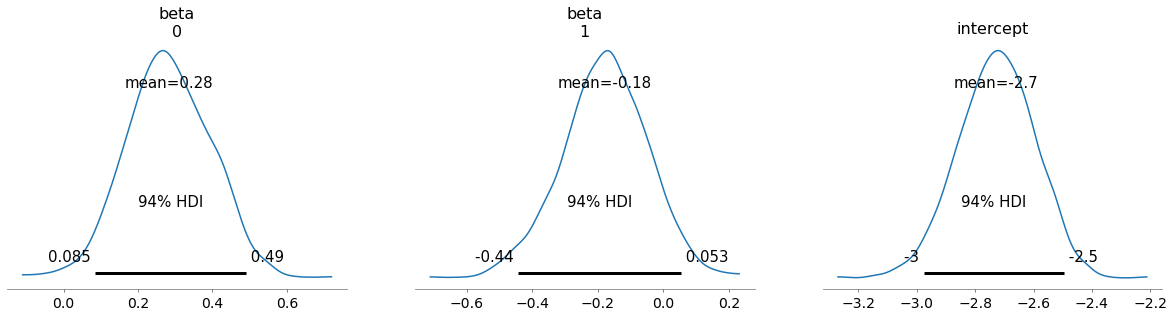

In [17]:
# Summary of posterior
az.summary(trace)

# Plot posterior distributions
az.plot_posterior(trace)
plt.show()

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/benazirrowe/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>]], dtype=object)

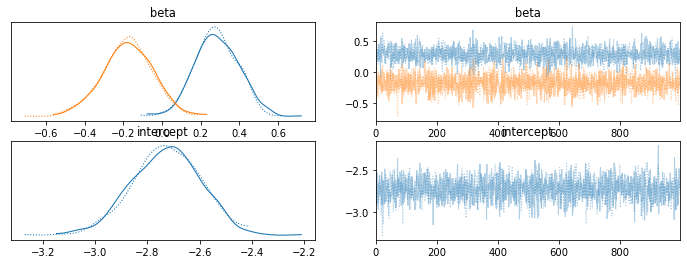

In [24]:
az.plot_trace(trace)

In [25]:
az.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/benazirrowe/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],0.282,0.113,0.085,0.491,0.003,0.002,1739.0,1390.0,1.0
beta[1],-0.179,0.130,-0.443,0.053,0.003,0.002,2280.0,1155.0,1.0
intercept,-2.728,0.130,-2.975,-2.497,0.003,0.002,1819.0,1247.0,1.0


In [33]:
model.basic_RVs
model.free_RVs
model.observed_RVs

[y_obs ~ Poisson]